In [70]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd
import numpy as np
import random
import os
os.environ['R_HOME'] = 'C:\Programming\R\R-4.4.2'

In [71]:
# 재현성 난수 고정
SEED = 100

os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

random.seed(SEED)
np.random.seed(SEED)

In [94]:
# data load
# name = 'pdbbind'
df = pd.read_csv(r'C:\Users\user\Desktop\연구\2. 위해기체\데이터셋\forMe.csv')

smiles_list = df['Smiles'].tolist()

# target 정의
target1 = df.iloc[:,8]
target = target1.dropna()
print(smiles_list[:5])
print(target[:5])

['C=O', 'CNN', 'C(=O)O', 'CCl', 'CN']
0    0.35
1   -1.05
2   -0.54
3    0.91
4   -0.57
Name: LogP, dtype: float64


In [97]:
# 분자 특성 추출 class
class MolecularFeatureExtractor:
    def __init__(self):
        self.descriptors = [desc[0] for desc in Descriptors._descList]

    def extract_molecular_features(self, smiles_list):
        features_dict = {desc: [] for desc in self.descriptors}

        for smiles in smiles_list:
            mol = Chem.MolFromSmiles(smiles)
            if mol:
                for descriptor_name in self.descriptors:
                    descriptor_function = getattr(Descriptors, descriptor_name)
                    try:
                        features_dict[descriptor_name].append(descriptor_function(mol))
                    except:
                        features_dict[descriptor_name].append(None)
            else:
                for descriptor_name in self.descriptors:
                    features_dict[descriptor_name].append(None)

        return pd.DataFrame(features_dict)

In [98]:
# 분자 특성 추출 및 데이터프레임 정의
extractor = MolecularFeatureExtractor()
df_all_features = extractor.extract_molecular_features(smiles_list)

df_all_features['target'] = target
df_all_features

[17:13:24] SMILES Parse Error: syntax error while parsing: FH
[17:13:24] SMILES Parse Error: Failed parsing SMILES 'FH' for input: 'FH'
[17:13:24] Explicit valence for atom # 1 Br, 5, is greater than permitted
[17:13:24] WARNING: not removing hydrogen atom without neighbors
[17:13:24] WARNING: not removing hydrogen atom without neighbors
[17:13:24] WARNING: not removing hydrogen atom without neighbors


,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,target
0,8.000000,2.000000,8.000000,2.000000,0.360624,30.026,28.010,30.010565,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.35
1,4.597222,1.652778,4.597222,1.652778,0.273315,46.073,40.025,46.053098,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.05
2,8.361111,-0.250000,8.361111,0.250000,0.380161,46.025,44.009,46.005479,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.54
3,4.638889,1.472222,4.638889,1.472222,0.357363,50.488,47.464,49.992328,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.91
4,4.500000,1.500000,4.500000,1.500000,0.384658,31.058,26.018,31.042199,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,10.611948,-1.114028,10.611948,0.016019,0.550122,180.159,172.095,180.042259,68.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.18
135,3.950370,1.053241,3.950370,1.053241,0.592133,144.177,136.113,144.068748,54.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
136,2.120370,0.000000,2.120370,0.000000,0.452106,257.164,243.052,256.053404,86.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.20
137,10.051751,-4.096366,10.051751,0.439375,0.393419,169.073,161.009,169.014009,60.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.00


In [99]:
num_all_features = df_all_features.shape[1] - 1  # logvp 열 제외
print("초기 변수 개수:", num_all_features)

초기 변수 개수: 208


# 1. NA Handling

In [100]:
df_all_features.dropna(inplace = True)

In [101]:
# NA 확인
df_all_features[df_all_features.isna().any(axis = 1)]

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,target


In [102]:
# 결측치가 포함된 feature 개수
print('결측치가 포함된 열 개수:', df_all_features.isna().any(axis = 0).sum(), '\n')
print(df_all_features.isna().any(axis = 0))

결측치가 포함된 열 개수: 0 

MaxEStateIndex       False
MinEStateIndex       False
MaxAbsEStateIndex    False
MinAbsEStateIndex    False
qed                  False
                     ...  
fr_thiocyan          False
fr_thiophene         False
fr_unbrch_alkane     False
fr_urea              False
target               False
Length: 209, dtype: bool


In [103]:
# 결측치가 포함된 feature 제거
df_removed_features = df_all_features.dropna(axis = 1)
num_removed_features = df_removed_features.shape[1] - 1  # logvp 열 제외

print("제거 후 남은 feature 개수:", num_removed_features)

제거 후 남은 feature 개수: 208


In [104]:
# 결측치가 제거된 data frame
df_removed_features

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,target
0,8.000000,2.000000,8.000000,2.000000,0.360624,30.026,28.010,30.010565,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.35
1,4.597222,1.652778,4.597222,1.652778,0.273315,46.073,40.025,46.053098,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.05
2,8.361111,-0.250000,8.361111,0.250000,0.380161,46.025,44.009,46.005479,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.54
3,4.638889,1.472222,4.638889,1.472222,0.357363,50.488,47.464,49.992328,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.91
4,4.500000,1.500000,4.500000,1.500000,0.384658,31.058,26.018,31.042199,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,10.506944,-2.654321,10.506944,1.351466,0.516867,124.076,115.004,124.028931,44.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.61
133,10.524469,-0.115102,10.524469,0.115102,0.595026,151.165,142.093,151.063329,58.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.46
134,10.611948,-1.114028,10.611948,0.016019,0.550122,180.159,172.095,180.042259,68.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.18
136,2.120370,0.000000,2.120370,0.000000,0.452106,257.164,243.052,256.053404,86.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.20


# 2. nunique == 1 인 경우

In [105]:
unique_columns = list(df_removed_features.loc[:, df_removed_features.nunique() == 1].columns)
print('nunique == 1인 feature : \n', unique_columns, '\n')

# nunique == 1인 feature 제거
#df_removed_features.drop(columns = unique_columns, inplace = True)
df_removed_features = df_removed_features.drop(columns = unique_columns).copy()

num_removed_features = df_removed_features.shape[1] - 1  # logvp 열 제외

print("제거 후 남은 feature 개수:", num_removed_features, '\n')
print(df_removed_features.shape)


nunique == 1인 feature : 
 ['SMR_VSA8', 'SlogP_VSA9', 'EState_VSA11', 'fr_ArN', 'fr_Ar_NH', 'fr_HOCCN', 'fr_N_O', 'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_SH', 'fr_alkyl_carbamate', 'fr_amidine', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzodiazepine', 'fr_bicyclic', 'fr_diazo', 'fr_dihydropyridine', 'fr_furan', 'fr_guanido', 'fr_hdrzone', 'fr_imidazole', 'fr_imide', 'fr_isothiocyan', 'fr_lactam', 'fr_lactone', 'fr_morpholine', 'fr_oxazole', 'fr_oxime', 'fr_phos_acid', 'fr_phos_ester', 'fr_piperdine', 'fr_piperzine', 'fr_priamide', 'fr_prisulfonamd', 'fr_quatN', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_urea'] 

제거 후 남은 feature 개수: 162 

(67, 163)


In [106]:
df_removed_features

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_pyridine,fr_sulfide,fr_unbrch_alkane,target
0,8.000000,2.000000,8.000000,2.000000,0.360624,30.026,28.010,30.010565,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.35
1,4.597222,1.652778,4.597222,1.652778,0.273315,46.073,40.025,46.053098,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.05
2,8.361111,-0.250000,8.361111,0.250000,0.380161,46.025,44.009,46.005479,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.54
3,4.638889,1.472222,4.638889,1.472222,0.357363,50.488,47.464,49.992328,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.91
4,4.500000,1.500000,4.500000,1.500000,0.384658,31.058,26.018,31.042199,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,10.506944,-2.654321,10.506944,1.351466,0.516867,124.076,115.004,124.028931,44.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.61
133,10.524469,-0.115102,10.524469,0.115102,0.595026,151.165,142.093,151.063329,58.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.46
134,10.611948,-1.114028,10.611948,0.016019,0.550122,180.159,172.095,180.042259,68.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.18
136,2.120370,0.000000,2.120370,0.000000,0.452106,257.164,243.052,256.053404,86.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-4.20


# 3. 너무 낮은 variance를 가지는 경우

In [107]:
df_removed_features.var()

MaxEStateIndex            10.835838
MinEStateIndex             3.232517
MaxAbsEStateIndex         10.835838
MinAbsEStateIndex          1.380890
qed                        0.007869
                            ...    
fr_phenol_noOrthoHbond     0.043419
fr_pyridine                0.059701
fr_sulfide                 0.014925
fr_unbrch_alkane           0.059701
target                     2.873148
Length: 163, dtype: float64

In [108]:
low_variances = sorted(df_removed_features.var())
low_variances[:10]

[0.007869089607781763,
 0.011915229933385495,
 0.01492537313432835,
 0.01492537313432835,
 0.014925373134328351,
 0.014925373134328351,
 0.014925373134328351,
 0.014925373134328354,
 0.014925373134328354,
 0.014925373134328354]

In [109]:
columns_low_variances = []

for i in low_variances:
    if i < 0.001:
        column = df_removed_features.loc[:, df_removed_features.var() == i].columns
        columns_low_variances.append(column)
columns_low_variances = [item for index in columns_low_variances for item in index]

# 2. 중복 제거 및 유니크 값 추출
columns_low_variances = list(set(columns_low_variances))
print(columns_low_variances)

[]


In [110]:
# 낮은 분산의 변수 제거
df_removed_features = df_removed_features.drop(columns = columns_low_variances).copy()
num_removed_features = df_removed_features.shape[1] - 1  # logvp 열 제외

print("제거 후 남은 feature 개수:", num_removed_features, '\n')
print(df_removed_features.shape)

제거 후 남은 feature 개수: 162 

(67, 163)


In [111]:
df_removed_features

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_pyridine,fr_sulfide,fr_unbrch_alkane,target
0,8.000000,2.000000,8.000000,2.000000,0.360624,30.026,28.010,30.010565,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.35
1,4.597222,1.652778,4.597222,1.652778,0.273315,46.073,40.025,46.053098,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.05
2,8.361111,-0.250000,8.361111,0.250000,0.380161,46.025,44.009,46.005479,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.54
3,4.638889,1.472222,4.638889,1.472222,0.357363,50.488,47.464,49.992328,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.91
4,4.500000,1.500000,4.500000,1.500000,0.384658,31.058,26.018,31.042199,14.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,10.506944,-2.654321,10.506944,1.351466,0.516867,124.076,115.004,124.028931,44.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.61
133,10.524469,-0.115102,10.524469,0.115102,0.595026,151.165,142.093,151.063329,58.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.46
134,10.611948,-1.114028,10.611948,0.016019,0.550122,180.159,172.095,180.042259,68.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.18
136,2.120370,0.000000,2.120370,0.000000,0.452106,257.164,243.052,256.053404,86.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-4.20


# 4. 데이터 스크리닝 (ISIS)

In [112]:
X_train = df_removed_features.drop(columns = 'target')
y_train = df_removed_features['target']

print(X_train.shape)
print(y_train.shape)

(67, 162)
(67,)


In [113]:
# 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaling = scaler.transform(X_train)
print(X_train_scaling.shape)

(67, 162)


In [114]:
# Python to R type
from rpy2.robjects import r
from rpy2.robjects import pandas2ri
from rpy2.robjects import FloatVector

pandas2ri.activate()

X_train_scaling = r['as.matrix'](X_train_scaling)

y_train = FloatVector(y_train)

nfolds = 10
nfolds = FloatVector([nfolds])[0]

nsis = 100
nsis = FloatVector([nsis])[0]

seed = 9
seed = FloatVector([seed])[0]

In [115]:
from rpy2.robjects.packages import importr
import sys
import io

SIS = importr('SIS')

# R 출력이 발생할 때 UTF-8 오류를 방지하기 위해, 표준 출력을 임시로 바꿔서 처리할 수 있습니다.
#r('Sys.setlocale("LC_ALL", "C.UTF-8")')

# model1 = SIS(...)
model1 = SIS.SIS(X_train_scaling,y_train,
    family="gaussian",
#    penalty="MCP",
    tune="cv",
    nfolds=nfolds,
    nsis=nsis,
    varISIS="aggr",
    seed=seed,
    q = 0.95,
    standardize=False)


Iter 1 , screening:  12 13 33 35 47 56 66 68 75 76 78 79 87 92 100 106 107 108 109 115 116 117 118 124 129 130 139 
Iter 1 , selection:  13 56 66 76 78 79 87 92 100 107 108 129 130 139 
Iter 1 , conditional-screening:  5 6 7 8 11 12 17 21 22 27 29 30 32 34 35 37 39 45 46 47 52 59 63 64 65 68 70 77 80 81 84 85 91 95 96 98 99 102 103 105 109 110 111 112 114 115 116 117 118 128 132 148 
Iter 2 , screening:  5 6 7 8 11 12 13 17 21 22 27 29 30 32 34 35 37 39 45 46 47 52 56 59 63 64 65 66 68 70 76 77 78 79 80 81 84 85 87 91 92 95 96 98 99 100 102 103 105 107 108 109 110 111 112 114 115 116 117 118 128 129 130 132 139 148 
Iter 2 , selection:  11 46 52 59 63 64 65 68 81 84 87 92 95 96 98 99 100 108 128 139 
Iter 2 , conditional-screening:  1 3 6 7 8 9 12 18 25 27 28 29 30 31 33 34 35 39 40 41 43 45 47 48 51 53 55 60 61 66 67 69 70 72 76 77 79 90 93 94 97 104 121 124 126 129 133 137 140 147 
Iter 3 , screening:  1 3 6 7 8 9 11 12 18 25 27 28 29 30 31 33 34 35 39 40 41 43 45 46 47 48 51 52 53 5

In [116]:
print(str(model1))

$sis.ix0
 [1]  12  13  33  35  47  56  66  68  75  76  78  79  87  92 100 106 107 108 109
[20] 115 116 117 118 124 129 130 139

$ix
[1]  52  53  89  91  98 112 119

$coef.est
(Intercept)         X52         X53         X89         X91         X98 
 0.82159701 -0.13054780  0.05224062  0.08122045 -0.26862396  0.08141770 
       X112        X119 
-0.04511213  1.48013097 

$fit
$beta
              1.4537     1.3557    1.2644    1.1791    1.0997    1.0256
(Intercept) 0.821597 0.82159701 0.8215970 0.8215970 0.8215970 0.8215970
V1          0.000000 0.00000000 0.0000000 0.0000000 0.0000000 0.0000000
V2          0.000000 0.00000000 0.0000000 0.0000000 0.0000000 0.0000000
V3          0.000000 0.00000000 0.0000000 0.0000000 0.0000000 0.0000000
V4          0.000000 0.00000000 0.0000000 0.0000000 0.0000000 0.0000000
V5          0.000000 0.00000000 0.0000000 0.0000000 0.0000000 0.0000000
V6          0.000000 0.00000000 0.0000000 0.0000000 0.0000000 0.0000000
V7          0.000000 0.00000000 0.0000000

In [117]:
print(df_removed_features.shape)
print('\n')
print(df_removed_features.columns)

(67, 163)


Index(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'NumRadicalElectrons',
       ...
       'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_nitroso',
       'fr_para_hydroxylation', 'fr_phenol', 'fr_phenol_noOrthoHbond',
       'fr_pyridine', 'fr_sulfide', 'fr_unbrch_alkane', 'target'],
      dtype='object', length=163)


In [118]:
# 선택된 feature들의 index
selected_features_ISIS = np.array(model1.rx2('ix'))

# R은 index가 1부터 시작하므로 python에 맞게 보정
selected_features_ISIS = selected_features_ISIS - 1
selected_features_ISIS

array([ 51,  52,  88,  90,  97, 111, 118])

In [119]:
df_removed_features_columns = df_removed_features.columns
print(f'ISIS 적용 전 features: {df_removed_features_columns.size}개')
print(df_removed_features_columns, '\n')

selected_features = df_removed_features_columns[selected_features_ISIS]
print(f'ISIS 적용 후 features: {selected_features.size}개')
print(selected_features)

ISIS 적용 전 features: 163개
Index(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'NumRadicalElectrons',
       ...
       'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_nitroso',
       'fr_para_hydroxylation', 'fr_phenol', 'fr_phenol_noOrthoHbond',
       'fr_pyridine', 'fr_sulfide', 'fr_unbrch_alkane', 'target'],
      dtype='object', length=163) 

ISIS 적용 후 features: 7개
Index(['PEOE_VSA2', 'PEOE_VSA3', 'EState_VSA8', 'VSA_EState1', 'VSA_EState7',
       'NumHDonors', 'MolLogP'],
      dtype='object')


In [120]:
df_ISIS = df_removed_features[list(selected_features) + ['target']]
df_ISIS

,PEOE_VSA2,PEOE_VSA3,EState_VSA8,VSA_EState1,VSA_EState7,NumHDonors,MolLogP,target
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-0.1849,0.35
1,11.268462,0.000000,11.268462,0.000000,0.000000,2.0,-0.9205,-1.05
2,4.794537,0.000000,0.000000,0.000000,0.000000,1.0,-0.2992,-0.54
3,0.000000,0.000000,11.600940,0.000000,1.472222,0.0,0.8550,0.91
4,0.000000,0.000000,5.733667,0.000000,0.000000,1.0,-0.4251,-0.57
...,...,...,...,...,...,...,...,...
132,4.565048,0.000000,9.047494,19.347222,0.000000,0.0,1.1021,-0.61
133,4.794537,0.000000,5.316789,0.000000,0.000000,2.0,1.3506,0.46
134,4.794537,4.794537,4.736863,4.686898,0.000000,1.0,1.3101,1.18
136,0.000000,9.134199,49.052843,4.068333,8.231481,0.0,-4.9894,-4.20


# 5. 엘라스틱 넷

In [121]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [122]:
X_ISIS = df_ISIS.drop(columns = ['target'])
y_ISIS = df_ISIS['target']

# train / test split
X_train, X_test, y_train, y_test = train_test_split(X_ISIS, y_ISIS, test_size = 0.2, random_state = SEED)

# scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaling = scaler.transform(X_train)
X_test_scaling = scaler.transform(X_test)

print(X_train_scaling.shape)
print(X_test_scaling.shape)

(53, 7)
(14, 7)


In [123]:
# ElasticNet 모델과 하이퍼파라미터 범위 설정
elastic_net = ElasticNet(max_iter = 5000)
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],  # 정규화 강도
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]  # L1과 L2 비율
}

kfold = KFold(n_splits = 5, shuffle = True, random_state = SEED)

# GridSearchCV를 사용하여 최적 하이퍼파라미터 탐색
grid_search = GridSearchCV(
    estimator = elastic_net,
    param_grid = param_grid,
    scoring = 'neg_mean_squared_error', # 그리드서치에서는 score가 최대가 되도록 하는 것이 목표라서 그냥 mse로 하면 값이 작을수록 좋아져버리니까 negative
    cv = kfold,
    verbose = 1,
    n_jobs = -1
)

grid_search.fit(X_train_scaling, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=ElasticNet(max_iter=5000), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [124]:
best_params = grid_search.best_params_
print(best_params)

{'alpha': 0.01, 'l1_ratio': 1.0}


In [125]:
# 최적 하이퍼파라미터로 ElasticNet 모델 생성
best_params = grid_search.best_params_

best_elastic_net = ElasticNet(
    alpha = best_params['alpha'],
    l1_ratio = best_params['l1_ratio'],
    max_iter = 5000,
    fit_intercept=True
)

In [126]:
# 적합
best_elastic_net.fit(X_train_scaling, y_train)

coefficients = best_elastic_net.coef_
coefficients.size

7

In [127]:
# 엘라스틱넷 적합이후 모든 변수
selected_features_elastic = list(X_train.loc[:, best_elastic_net.coef_ != 0].columns)

print(f'# {len(X_train.loc[:, best_elastic_net.coef_ != 0].columns)}개')
print(f'{df_name}_all =', selected_features_elastic, '\n')

# 7개
pdbbind_all = ['PEOE_VSA2', 'PEOE_VSA3', 'EState_VSA8', 'VSA_EState1', 'VSA_EState7', 'NumHDonors', 'MolLogP'] 



In [299]:
# 계수 0인 변수
print(f'회귀계수가 0 인 변수: {len(X_train.loc[:, best_elastic_net.coef_ == 0].columns)}개')
print(f'{df_name}_all =', X_train.columns[best_elastic_net.coef_ == 0], '\n')

회귀계수가 0 인 변수: 0개
pdbbind_all = Index([], dtype='object') 



## default 3개 이용 (나머지 변수는 랜덤이라 성능 X)

In [300]:
# default = ['HeavyAtomCount', 'ExactMolWt', 'RingCount']
# default_inc = [item for item in default if item in selected_features_elastic]
# default_inc.sort(key = lambda x: default.index(x))


# def mol_conv_upper(elastic_list):
#     print('mol_conv.py upper')

#     elastic_list_copy = elastic_list.copy()
#     idx = 0
#     n = 0
#     for dft in default_inc:
#         if dft in elastic_list_copy:
#             if n % 5 == 0: print(f'# {n+1}')
#             print(f"mol_graph.{dft} = dsc.{dft}(mol)")
#             elastic_list_copy.remove(dft)
#             idx += 1
#             n += 1
#     for i in elastic_list_copy:
#         if n % 5 == 0: print(f'# {n+1}')
#         print(f"mol_graph.{i} = dsc.{i}(mol)")
#         idx += 1
#         n += 1


# def mol_conv_under(elastic_list):
#     print('\n')
#     print('mol_conv.py under')
#     elastic_list_copy = elastic_list.copy()
#     idx = 0
#     n = 0
#     for dft in default_inc:
#         if dft in elastic_list_copy:
#             if n % 5 == 0: print(f'# {n+1}')
#             print(f"normalize_self_feat(mol_graphs, '{dft}')")
#             elastic_list_copy.remove(dft)
#             idx += 1
#             n += 1
#     for i in elastic_list_copy:
#         if n % 5 == 0: print(f'# {n+1}')
#         print(f"normalize_self_feat(mol_graphs, '{i}')")
#         idx += 1
#         n += 1

# def exec_reg(elastic_list):
#     print('\n')
#     print('exec_reg.py')
#     elastic_list_copy = elastic_list.copy()
#     idx = 0
#     n = 0
#     for dft in default_inc:
#         if dft in elastic_list_copy:
#             if n % 5 == 0: print(f'# {n+1}')
#             print(f"self_feats[i, {n}] = mol_graph.{dft}")
#             elastic_list_copy.remove(dft)
#             idx += 1
#             n += 1
#     for i in elastic_list_copy:
#         if n % 5 == 0: print(f'# {n+1}')
#         print(f"self_feats[i, {n}] = mol_graph.{i}")
#         idx += 1
#         n += 1


# mol_conv_upper(selected_features_elastic)
# mol_conv_under(selected_features_elastic)
# exec_reg(selected_features_elastic)


# abs(coef)

In [128]:
# 계수가 0인 변수는 제거
X_train_None0 = X_train.drop(columns=X_train.columns[best_elastic_net.coef_ == 0])
coefficients_None0 = coefficients[coefficients!=0]

# 특성과 회귀계수 매핑
df_final_selected_features = pd.DataFrame({'Feature' : X_train_None0.columns,
                                       'Coefficient' : coefficients_None0})

# 계수 큰 값 기준으로
final_selected_features = abs(df_final_selected_features['Coefficient']).sort_values(ascending = False)
final_selected_features_index = final_selected_features.index

X_train_None0 = X_train_None0.iloc[:, final_selected_features_index]

def mol_conv_upper(elastic_list, df):
    print('mol_conv.py upper')

    elastic_list_copy = elastic_list.copy()
    X_train_None0_copy = df.copy()

    idx = 0
    n = 0

    for i in range(len(elastic_list_copy)):
        if n % 5 == 0: print(f'# {n+1}')
        print(f"mol_graph.{X_train_None0_copy.columns[i]} = dsc.{X_train_None0_copy.columns[i]}(mol)")
        idx += 1
        n += 1

def mol_conv_under(elastic_list, df):
    print('\n')
    print('mol_conv.py under')

    elastic_list_copy = elastic_list.copy()
    X_train_None0_copy = df.copy()

    idx = 0
    n = 0

    for i in range(len(elastic_list_copy)):
        if n % 5 == 0: print(f'# {n+1}')
        print(f"normalize_self_feat(mol_graphs, '{X_train_None0_copy.columns[i]}')")
        idx += 1
        n += 1

def exec_reg(elastic_list, df):
    print('\n')
    print('exec_reg.py')

    elastic_list_copy = elastic_list.copy()
    X_train_None0_copy = df.copy()

    idx = 0
    n = 0

    for i in range(len(elastic_list_copy)):
        if n % 5 == 0: print(f'# {n+1}')
        print(f"self_feats[i, {n}] = mol_graph.{X_train_None0_copy.columns[i]}")
        idx += 1
        n += 1

# 출력
mol_conv_upper(selected_features_elastic, X_train_None0)
mol_conv_under(selected_features_elastic, X_train_None0)
exec_reg(selected_features_elastic, X_train_None0)

mol_conv.py upper
# 1
mol_graph.MolLogP = dsc.MolLogP(mol)
mol_graph.VSA_EState1 = dsc.VSA_EState1(mol)
mol_graph.EState_VSA8 = dsc.EState_VSA8(mol)
mol_graph.PEOE_VSA3 = dsc.PEOE_VSA3(mol)
mol_graph.NumHDonors = dsc.NumHDonors(mol)
# 6
mol_graph.PEOE_VSA2 = dsc.PEOE_VSA2(mol)
mol_graph.VSA_EState7 = dsc.VSA_EState7(mol)


mol_conv.py under
# 1
normalize_self_feat(mol_graphs, 'MolLogP')
normalize_self_feat(mol_graphs, 'VSA_EState1')
normalize_self_feat(mol_graphs, 'EState_VSA8')
normalize_self_feat(mol_graphs, 'PEOE_VSA3')
normalize_self_feat(mol_graphs, 'NumHDonors')
# 6
normalize_self_feat(mol_graphs, 'PEOE_VSA2')
normalize_self_feat(mol_graphs, 'VSA_EState7')


exec_reg.py
# 1
self_feats[i, 0] = mol_graph.MolLogP
self_feats[i, 1] = mol_graph.VSA_EState1
self_feats[i, 2] = mol_graph.EState_VSA8
self_feats[i, 3] = mol_graph.PEOE_VSA3
self_feats[i, 4] = mol_graph.NumHDonors
# 6
self_feats[i, 5] = mol_graph.PEOE_VSA2
self_feats[i, 6] = mol_graph.VSA_EState7


In [302]:
# 통계량
re1 = pd.DataFrame(df_ISIS.iloc[:, -1].describe()).T
re2 = df_ISIS.iloc[:, final_selected_features_index].describe().T

re3 = pd.concat([re1, re2], axis = 0)
print(re3)

                          count       mean        std           min  \
target                   9880.0   6.243831   1.721764  4.000000e-01   
VSA_EState6              9880.0   6.687242   8.858869 -2.728175e+01   
Chi4n                    9880.0   3.720386   2.653301  0.000000e+00   
MolLogP                  9880.0   0.007070   4.642694 -2.501300e+01   
NumAromaticHeterocycles  9880.0   0.787045   0.922217  0.000000e+00   
fr_halogen               9880.0   0.450810   0.988039  0.000000e+00   
FractionCSP3             9880.0   0.403873   0.267516  0.000000e+00   
SlogP_VSA6               9880.0  36.200433  26.552008  0.000000e+00   
PEOE_VSA3                9880.0   5.330659   6.737108  0.000000e+00   
SlogP_VSA3               9880.0  17.818424  21.055484  0.000000e+00   
fr_Ndealkylation2        9880.0   0.158907   0.556233  0.000000e+00   
fr_Al_COO                9880.0   0.410830   0.843417  0.000000e+00   
fr_NH2                   9880.0   0.639271   1.157868  0.000000e+00   
MinAbs

In [303]:
# overleaf 양식에 맞게 통계량 출력
for i in range(len(re3)):
    print(f'{re3.iloc[i].name.replace("_", "")} & {re3.iloc[i]["mean"]:.2f} & {re3.iloc[i]["std"]:.2f} & {re3.iloc[i]["min"]:.2f} & {re3.iloc[i]["25%"]:.2f} & {re3.iloc[i]["50%"]:.2f} & {re3.iloc[i]["75%"]:.2f} & {re3.iloc[i]["max"]:.2f} \\\\')

target & 6.24 & 1.72 & 0.40 & 5.02 & 6.40 & 7.62 & 9.30 \\
VSAEState6 & 6.69 & 8.86 & -27.28 & 0.00 & 6.70 & 12.54 & 46.62 \\
Chi4n & 3.72 & 2.65 & 0.00 & 2.02 & 3.10 & 4.64 & 19.40 \\
MolLogP & 0.01 & 4.64 & -25.01 & -1.98 & 1.38 & 3.12 & 12.54 \\
NumAromaticHeterocycles & 0.79 & 0.92 & 0.00 & 0.00 & 1.00 & 1.00 & 7.00 \\
frhalogen & 0.45 & 0.99 & 0.00 & 0.00 & 0.00 & 0.00 & 11.00 \\
FractionCSP3 & 0.40 & 0.27 & 0.00 & 0.20 & 0.38 & 0.59 & 1.00 \\
SlogPVSA6 & 36.20 & 26.55 & 0.00 & 16.23 & 34.36 & 54.60 & 170.51 \\
PEOEVSA3 & 5.33 & 6.74 & 0.00 & 0.00 & 4.79 & 9.50 & 89.93 \\
SlogPVSA3 & 17.82 & 21.06 & 0.00 & 4.79 & 11.22 & 22.37 & 184.89 \\
frNdealkylation2 & 0.16 & 0.56 & 0.00 & 0.00 & 0.00 & 0.00 & 10.00 \\
frAlCOO & 0.41 & 0.84 & 0.00 & 0.00 & 0.00 & 1.00 & 9.00 \\
frNH2 & 0.64 & 1.16 & 0.00 & 0.00 & 0.00 & 1.00 & 13.00 \\
MinAbsEStateIndex & 0.18 & 0.26 & 0.00 & 0.03 & 0.10 & 0.23 & 5.62 \\
PEOEVSA9 & 18.48 & 15.17 & 0.00 & 6.61 & 16.38 & 25.16 & 330.34 \\
fralkylhalide & 0.15 &

In [304]:
col_order = X_train_None0.columns
df_corr = df_ISIS.drop(columns=['target'])[col_order]
df_corr = df_corr.corr()
df_corr

,VSA_EState6,Chi4n,MolLogP,NumAromaticHeterocycles,fr_halogen,FractionCSP3,SlogP_VSA6,PEOE_VSA3,SlogP_VSA3,fr_Ndealkylation2,...,fr_N_O,fr_unbrch_alkane,fr_Ar_COO,fr_nitrile,fr_sulfone,VSA_EState8,fr_thiazole,VSA_EState9,fr_Ar_NH,fr_pyridine
VSA_EState6,1.000000,-0.186920,0.731585,0.231047,0.124028,-0.594778,0.788564,0.182004,-0.404926,-0.172725,...,-0.015555,-0.192286,0.093407,0.110819,0.071462,-0.217612,0.038925,-0.049090,-0.035112,0.226847
Chi4n,-0.186920,1.000000,-0.388963,0.004769,-0.084051,0.307620,0.261931,-0.038351,0.797482,0.451369,...,-0.031267,0.183173,-0.084147,-0.024677,0.007860,0.540338,-0.026312,0.067177,0.110939,-0.025800
MolLogP,0.731585,-0.388963,1.000000,0.288989,0.302185,-0.507145,0.447851,0.221853,-0.653913,-0.203046,...,0.012463,-0.145854,0.062581,0.096817,0.075506,-0.082923,0.100304,-0.000619,-0.060372,0.229615
NumAromaticHeterocycles,0.231047,0.004769,0.288989,1.000000,0.081041,-0.400037,0.305729,0.405972,-0.156091,-0.080247,...,-0.062864,-0.101758,-0.003426,0.071761,0.007192,-0.051979,0.181110,0.086322,0.465803,0.481515
fr_halogen,0.124028,-0.084051,0.302185,0.081041,1.000000,-0.227485,0.139954,0.212843,-0.131842,-0.049872,...,-0.012390,-0.071955,0.036934,0.063710,0.093630,-0.132953,0.011909,-0.052631,-0.038848,0.104978
FractionCSP3,-0.594778,0.307620,-0.507145,-0.400037,-0.227485,1.000000,-0.579585,-0.246376,0.346933,0.189113,...,0.032717,0.243832,-0.214750,-0.097160,-0.032579,0.306619,-0.081050,0.074754,-0.177038,-0.239686
SlogP_VSA6,0.788564,0.261931,0.447851,0.305729,0.139954,-0.579585,1.000000,0.239449,0.083706,-0.024369,...,-0.038650,-0.116810,0.075152,0.053411,0.089240,0.019920,0.030715,-0.087095,0.107831,0.253580
PEOE_VSA3,0.182004,-0.038351,0.221853,0.405972,0.212843,-0.246376,0.239449,1.000000,-0.030474,-0.096324,...,0.066435,-0.095373,-0.060804,0.048173,0.183576,-0.078634,0.178032,-0.456725,0.091338,0.135680
SlogP_VSA3,-0.404926,0.797482,-0.653913,-0.156091,-0.131842,0.346933,0.083706,-0.030474,1.000000,0.317443,...,0.000219,0.215896,-0.114927,-0.057725,0.021304,0.418183,-0.045398,-0.119494,0.087709,-0.139173
fr_Ndealkylation2,-0.172725,0.451369,-0.203046,-0.080247,-0.049872,0.189113,-0.024369,-0.096324,0.317443,1.000000,...,-0.021172,0.035307,-0.052440,-0.017001,-0.011297,0.206162,-0.017317,0.016202,0.008229,-0.044517


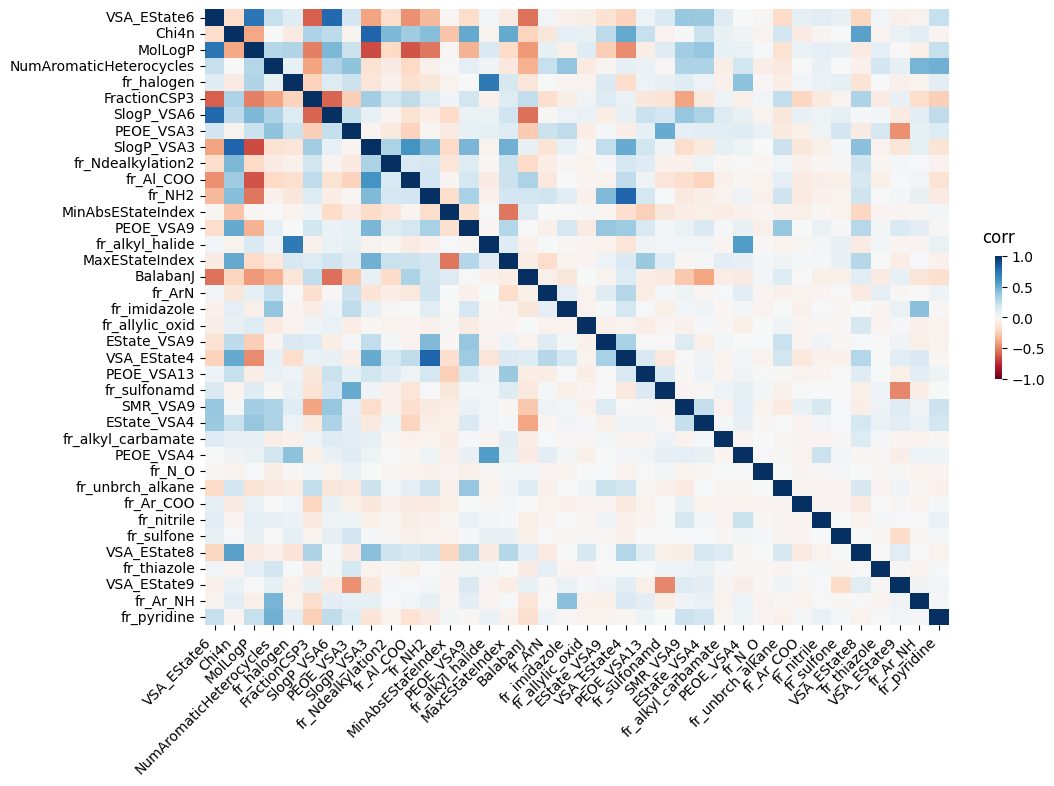

In [305]:
# heatmap
# 상관관계 행렬

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
ax = sns.heatmap(df_corr, annot = False, center = 0, cmap = 'RdBu', vmin=-1, vmax=1, cbar_kws={'shrink': 0.2, 'aspect': 20}, xticklabels=True)

# Color bar 타이틀 설정
colorbar = ax.collections[0].colorbar
colorbar.ax.set_title("corr", fontsize=12, pad = 10)
plt.xticks(rotation=45, ha='right', fontsize=10)

# 저장
os.chdir(r'C:\Users\user\Desktop\연구\EGCN\성능\result\heatmap')
plt.savefig(f'heatmap_{df_name}.png', dpi = 300, bbox_inches = 'tight')

plt.show()

In [306]:
# 상관관계 수치
# 상관관계 |r| < 0.1의 개수
num_low_corr = np.count_nonzero(~np.isnan(df_corr[np.abs(df_corr) < 0.1]))
print(num_low_corr)

# 전체 개수
# 행 * 열 - 대각선
num_corr = (df_corr.shape[0] * df_corr.shape[1] - df_corr.shape[0])

# 전체에서 가지는 비율
print(num_low_corr / num_corr)

896
0.6372688477951636


In [307]:
df_corr['MaxEStateIndex']

VSA_EState6               -0.080065
Chi4n                      0.514475
MolLogP                   -0.189144
NumAromaticHeterocycles   -0.108074
fr_halogen                 0.164540
FractionCSP3               0.138538
SlogP_VSA6                 0.199958
PEOE_VSA3                  0.122308
SlogP_VSA3                 0.477811
fr_Ndealkylation2          0.225148
fr_Al_COO                  0.218269
fr_NH2                     0.183368
MinAbsEStateIndex         -0.538707
PEOE_VSA9                  0.290360
fr_alkyl_halide            0.119024
MaxEStateIndex             1.000000
BalabanJ                  -0.071475
fr_ArN                    -0.183441
fr_imidazole              -0.037030
fr_allylic_oxid           -0.030893
EState_VSA9                0.060640
VSA_EState4                0.148131
PEOE_VSA13                 0.373385
fr_sulfonamd               0.140278
SMR_VSA9                  -0.022915
EState_VSA4                0.022612
fr_alkyl_carbamate         0.104594
PEOE_VSA4                  0

# abs(coef) - default 3개 이용

In [308]:
# default = ['HeavyAtomCount', 'ExactMolWt', 'RingCount']
# default_inc = [item for item in default if item in selected_features_elastic]
# default_inc.sort(key = lambda x: default.index(x))

# # 계수가 0인 변수는 제거
# X_train_None0 = X_train.drop(columns=X_train.columns[best_elastic_net.coef_ == 0])
# coefficients_None0 = coefficients[coefficients!=0]

# # 특성과 회귀계수 매핑
# df_final_selected_features = pd.DataFrame({'Feature' : X_train_None0.columns,
#                                        'Coefficient' : coefficients_None0})

# # 계수 큰 값 기준으로
# final_selected_features = abs(df_final_selected_features['Coefficient']).sort_values(ascending = False)
# final_selected_features_index = final_selected_features.index

# X_train_None0 = X_train_None0.iloc[:, final_selected_features_index]


# def mol_conv_upper(elastic_list, df):
#     print('mol_conv.py upper')

#     elastic_list_copy = elastic_list.copy()
#     X_train_None0_copy = df.copy()

#     idx = 0
#     n = 0

#     for dft in default_inc:
#         if dft in elastic_list_copy:
#             if n % 5 == 0: print(f'# {n+1}')
#             print(f"mol_graph.{dft} = dsc.{dft}(mol)")
#             elastic_list_copy.remove(dft)
#             X_train_None0_copy.drop(columns = dft, inplace = True)
#             idx += 1
#             n += 1

#     for i in range(len(elastic_list_copy)):
#         if n % 5 == 0: print(f'# {n+1}')
#         print(f"mol_graph.{X_train_None0_copy.columns[i]} = dsc.{X_train_None0_copy.columns[i]}(mol)")
#         idx += 1
#         n += 1


# def mol_conv_under(elastic_list, df):
#     print('\n')
#     print('mol_conv.py under')

#     elastic_list_copy = elastic_list.copy()
#     X_train_None0_copy = df.copy()

#     idx = 0
#     n = 0

#     for dft in default_inc:
#         if dft in elastic_list_copy:
#             if n % 5 == 0: print(f'# {n+1}')
#             print(f"normalize_self_feat(mol_graphs, '{dft}')")
#             elastic_list_copy.remove(dft)
#             X_train_None0_copy.drop(columns = dft, inplace = True)
#             idx += 1
#             n += 1

#     for i in range(len(elastic_list_copy)):
#         if n % 5 == 0: print(f'# {n+1}')
#         print(f"normalize_self_feat(mol_graphs, '{X_train_None0_copy.columns[i]}')")
#         idx += 1
#         n += 1

# def exec_reg(elastic_list, df):
#     print('\n')
#     print('exec_reg.py')

#     elastic_list_copy = elastic_list.copy()
#     X_train_None0_copy = df.copy()

#     idx = 0
#     n = 0

#     for dft in default_inc:
#         if dft in elastic_list_copy:
#             if n % 5 == 0: print(f'# {n+1}')
#             print(f"self_feats[i, {n}] = mol_graph.{dft}")
#             elastic_list_copy.remove(dft)
#             X_train_None0_copy.drop(columns = dft, inplace = True)
#             idx += 1
#             n += 1

#     for i in range(len(elastic_list_copy)):
#         if n % 5 == 0: print(f'# {n+1}')
#         print(f"self_feats[i, {n}] = mol_graph.{X_train_None0_copy.columns[i]}")
#         idx += 1
#         n += 1

# # 출력
# mol_conv_upper(selected_features_elastic, X_train_None0)
# mol_conv_under(selected_features_elastic, X_train_None0)
# exec_reg(selected_features_elastic, X_train_None0)

# 랜덤하게 3 5 7 10 20... (성능 안좋음)

In [309]:
# random.seed(SEED)

# f_idx = random.sample(range(len(selected_features_elastic)), len(selected_features_elastic))

# n = 0
# for i in f_idx:
#     if n % 5 == 0: print(f'# {n+1}')
#     print(f"mol_graph.{selected_features_elastic[i]} = dsc.{selected_features_elastic[i]}(mol)")
#     n += 1

# print('\n')
# n = 0
# for i in f_idx:
#     if n % 5 == 0: print(f'# {n+1}')
#     print(f"normalize_self_feat(mol_graphs, '{selected_features_elastic[i]}')")
#     n += 1

# print('\n')
# n = 0
# for i in f_idx:
#     if n % 5 == 0: print(f'# {n+1}')
#     print(f"self_feats[i, {n}] = mol_graph.{selected_features_elastic[i]}")
#     n += 1


# Permutation Importance 신뢰구간 95%

In [310]:
from sklearn.inspection import permutation_importance
from scipy.stats import norm

# Permutation Importance 계산
r = permutation_importance(best_elastic_net, X_test_scaling, y_test,
                           n_repeats=100,
                           random_state=SEED)

# p-value를 계산하고 유의미한 값 추출
significant_features = []
p_values = []

for i in r.importances_mean.argsort()[::-1]:
    mean = r.importances_mean[i]
    std = r.importances_std[i]
    
    # 신뢰구간 계산
    lower_bound = mean - 1.96 * std
    upper_bound = mean + 1.96 * std
    
    # 양측검정 p-value 계산
    p_value = 2 * (1 - norm.cdf(abs(mean / std)))    
    
    significant_features.append((X_train.columns[i], mean, std, p_value))
    p_values.append(p_value)

for feature, mean, std, p_value in significant_features:
    print(f"{feature:<30} \t"
          f"Importance: {mean:.3f} +/- {std:.3f} \t p-value: {p_value:.3f}")


Chi4n                          	Importance: 0.101 +/- 0.009 	 p-value: 0.000
VSA_EState6                    	Importance: 0.099 +/- 0.008 	 p-value: 0.000
MolLogP                        	Importance: 0.095 +/- 0.008 	 p-value: 0.000
fr_halogen                     	Importance: 0.043 +/- 0.005 	 p-value: 0.000
FractionCSP3                   	Importance: 0.041 +/- 0.005 	 p-value: 0.000
SlogP_VSA6                     	Importance: 0.038 +/- 0.005 	 p-value: 0.000
NumAromaticHeterocycles        	Importance: 0.034 +/- 0.005 	 p-value: 0.000
fr_Ndealkylation2              	Importance: 0.025 +/- 0.004 	 p-value: 0.000
SlogP_VSA3                     	Importance: 0.025 +/- 0.004 	 p-value: 0.000
PEOE_VSA3                      	Importance: 0.023 +/- 0.004 	 p-value: 0.000
fr_NH2                         	Importance: 0.017 +/- 0.003 	 p-value: 0.000
fr_Al_COO                      	Importance: 0.015 +/- 0.003 	 p-value: 0.000
PEOE_VSA9                      	Importance: 0.014 +/- 0.003 	 p-value: 0.000

In [311]:
df_pvalues = pd.DataFrame()
col = []
pval = []
imp = []

for i, p in enumerate(p_values):
    col.append(significant_features[i][0])
    imp.append(significant_features[i][1])
    pval.append(significant_features[i][3])

df_pvalues['Feature'] = col
df_pvalues['Importance'] = imp
df_pvalues['p-value'] = pval

df_pvalues = df_pvalues.sort_values(by = 'Importance', ascending = False)
print(df_pvalues)

                    Feature  Importance       p-value
0                     Chi4n    0.101389  0.000000e+00
1               VSA_EState6    0.098543  0.000000e+00
2                   MolLogP    0.094506  0.000000e+00
3                fr_halogen    0.042686  2.220446e-16
4              FractionCSP3    0.040605  4.440892e-16
5                SlogP_VSA6    0.037654  6.661338e-16
6   NumAromaticHeterocycles    0.033790  3.159761e-11
7         fr_Ndealkylation2    0.025375  3.049186e-09
8                SlogP_VSA3    0.025311  4.166889e-12
9                 PEOE_VSA3    0.022598  3.024498e-08
10                   fr_NH2    0.016869  8.366547e-07
11                fr_Al_COO    0.015374  8.526504e-07
12                PEOE_VSA9    0.013879  7.952336e-07
13          fr_alkyl_halide    0.012180  1.191908e-06
14        MinAbsEStateIndex    0.011058  1.161773e-05
15                   fr_ArN    0.010772  1.867675e-06
16           MaxEStateIndex    0.010059  2.955972e-05
17          fr_allylic_oxid 

In [312]:
# 유의수준 0.05 이하인 변수 - 중요도 순으로 정렬 후 출력
df_pvalues_005 = df_pvalues[df_pvalues['p-value'] <= 0.05]
df_pvalues_005 = df_pvalues_005.sort_values(by = 'Importance', ascending = False).reset_index(drop = True)

print(df_pvalues_005)

                    Feature  Importance       p-value
0                     Chi4n    0.101389  0.000000e+00
1               VSA_EState6    0.098543  0.000000e+00
2                   MolLogP    0.094506  0.000000e+00
3                fr_halogen    0.042686  2.220446e-16
4              FractionCSP3    0.040605  4.440892e-16
5                SlogP_VSA6    0.037654  6.661338e-16
6   NumAromaticHeterocycles    0.033790  3.159761e-11
7         fr_Ndealkylation2    0.025375  3.049186e-09
8                SlogP_VSA3    0.025311  4.166889e-12
9                 PEOE_VSA3    0.022598  3.024498e-08
10                   fr_NH2    0.016869  8.366547e-07
11                fr_Al_COO    0.015374  8.526504e-07
12                PEOE_VSA9    0.013879  7.952336e-07
13          fr_alkyl_halide    0.012180  1.191908e-06
14        MinAbsEStateIndex    0.011058  1.161773e-05
15                   fr_ArN    0.010772  1.867675e-06
16           MaxEStateIndex    0.010059  2.955972e-05
17          fr_allylic_oxid 

In [313]:
# 최종 변수 출력
num_features = [3, 5, 7, 10, 20]

for i in num_features:
    print(f'{df_name}_{i} =', list(df_pvalues_005['Feature'][: i]))

print(f'# {len(df_pvalues_005)}개')
print(f'{df_name}_elastic =', list(df_pvalues_005['Feature']), '\n')

for i in range(len(df_pvalues_005['Feature'])):
    if i % 5 == 0: print(f'# {i+1}')
    print(f"mol_graph.{df_pvalues_005['Feature'][i]} = dsc.{df_pvalues_005['Feature'][i]}(mol)")

print('\n')

for i in range(len(df_pvalues_005['Feature'])):
    if i % 5 == 0: print(f'# {i+1}')
    print(f"normalize_self_feat(mol_graphs, '{df_pvalues_005['Feature'][i]}')")

print('\n')

for i in range(len(df_pvalues_005['Feature'])):
    if i % 5 == 0: print(f'# {i+1}')
    print(f"self_feats[i, {i}] = mol_graph.{df_pvalues_005['Feature'][i]}")

pdbbind_3 = ['Chi4n', 'VSA_EState6', 'MolLogP']
pdbbind_5 = ['Chi4n', 'VSA_EState6', 'MolLogP', 'fr_halogen', 'FractionCSP3']
pdbbind_7 = ['Chi4n', 'VSA_EState6', 'MolLogP', 'fr_halogen', 'FractionCSP3', 'SlogP_VSA6', 'NumAromaticHeterocycles']
pdbbind_10 = ['Chi4n', 'VSA_EState6', 'MolLogP', 'fr_halogen', 'FractionCSP3', 'SlogP_VSA6', 'NumAromaticHeterocycles', 'fr_Ndealkylation2', 'SlogP_VSA3', 'PEOE_VSA3']
pdbbind_20 = ['Chi4n', 'VSA_EState6', 'MolLogP', 'fr_halogen', 'FractionCSP3', 'SlogP_VSA6', 'NumAromaticHeterocycles', 'fr_Ndealkylation2', 'SlogP_VSA3', 'PEOE_VSA3', 'fr_NH2', 'fr_Al_COO', 'PEOE_VSA9', 'fr_alkyl_halide', 'MinAbsEStateIndex', 'fr_ArN', 'MaxEStateIndex', 'fr_allylic_oxid', 'BalabanJ', 'fr_imidazole']
# 33개
pdbbind_elastic = ['Chi4n', 'VSA_EState6', 'MolLogP', 'fr_halogen', 'FractionCSP3', 'SlogP_VSA6', 'NumAromaticHeterocycles', 'fr_Ndealkylation2', 'SlogP_VSA3', 'PEOE_VSA3', 'fr_NH2', 'fr_Al_COO', 'PEOE_VSA9', 'fr_alkyl_halide', 'MinAbsEStateIndex', 'fr_ArN', 'Ma

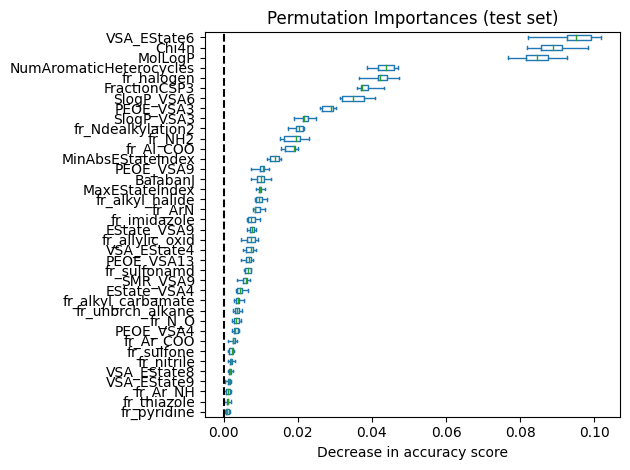

In [314]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    best_elastic_net, X_train_scaling, y_train, n_repeats=10, random_state=SEED, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_train.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

In [315]:
from sklearn.inspection import permutation_importance
r = permutation_importance(best_elastic_net, X_test_scaling, y_test,
                           n_repeats=30,
                           random_state=SEED, scoring = 'r2')
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_train.columns[i]:<35}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

VSA_EState6                        0.100 +/- 0.007
Chi4n                              0.099 +/- 0.009
MolLogP                            0.098 +/- 0.006
fr_halogen                         0.044 +/- 0.005
FractionCSP3                       0.040 +/- 0.005
SlogP_VSA6                         0.038 +/- 0.004
NumAromaticHeterocycles            0.033 +/- 0.006
SlogP_VSA3                         0.026 +/- 0.003
fr_Ndealkylation2                  0.026 +/- 0.005
PEOE_VSA3                          0.022 +/- 0.005
fr_Al_COO                          0.015 +/- 0.003
fr_NH2                             0.015 +/- 0.004
PEOE_VSA9                          0.013 +/- 0.002
fr_alkyl_halide                    0.011 +/- 0.002
fr_ArN                             0.011 +/- 0.003
MinAbsEStateIndex                  0.011 +/- 0.003
MaxEStateIndex                     0.010 +/- 0.002
fr_allylic_oxid                    0.009 +/- 0.002
fr_imidazole                       0.008 +/- 0.002
BalabanJ                       

In [316]:
scoring = ['r2']
r_multi = permutation_importance(
    best_elastic_net, X_test_scaling, y_test, n_repeats=30, random_state=SEED, scoring=scoring)
for metric in r_multi:
    print(f"{metric}")
    r = r_multi[metric]
    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 1.96 * r.importances_std[i] > 0:
            print(f"    {X_train.columns[i]:<35}"
                  f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")

r2
    VSA_EState6                        0.100 +/- 0.007
    Chi4n                              0.099 +/- 0.009
    MolLogP                            0.098 +/- 0.006
    fr_halogen                         0.044 +/- 0.005
    FractionCSP3                       0.040 +/- 0.005
    SlogP_VSA6                         0.038 +/- 0.004
    NumAromaticHeterocycles            0.033 +/- 0.006
    SlogP_VSA3                         0.026 +/- 0.003
    fr_Ndealkylation2                  0.026 +/- 0.005
    PEOE_VSA3                          0.022 +/- 0.005
    fr_Al_COO                          0.015 +/- 0.003
    fr_NH2                             0.015 +/- 0.004
    PEOE_VSA9                          0.013 +/- 0.002
    fr_alkyl_halide                    0.011 +/- 0.002
    fr_ArN                             0.011 +/- 0.003
    MinAbsEStateIndex                  0.011 +/- 0.003
    MaxEStateIndex                     0.010 +/- 0.002
    fr_allylic_oxid                    0.009 +/- 0.002
    fr_

# permutation test (p-value)

In [317]:
# from scipy.stats import norm

# # 순열 검정 수행
# permutation_scores = []
# for _ in range(1000):  # 1000회 순열
#     shuffled_y = np.random.permutation(y_test)
#     score = permutation_importance(best_elastic_net, X_test_scaling, shuffled_y,
#                                    n_repeats = 30, random_state = SEED)
#     permutation_scores.append(score.importances_mean)

# # 귀무가설 하 분포 생성
# null_distribution = np.array(permutation_scores)

In [318]:
# # p-value 계산
# p_values = []
# for i, mean in enumerate(r.importances_mean):
#     # 단측 검정: 귀무가설 하 중요도 > 관측 중요도
#     # p_value = (null_distribution[:, i] >= mean).mean()

#     # 양측 검정: 귀무가설 하 중요도 > 관측 중요도
#     p_value = (null_distribution[:, i] >= mean).mean()
#     p_values.append(p_value)

In [319]:
# df_pvalues = pd.DataFrame()
# col = []
# pval = []
# imp = []

# for i, p in enumerate(p_values):
#     col.append(X_train.columns[i])
#     imp.append(r.importances_mean[i])
#     pval.append(p)

# df_pvalues['Feature'] = col
# df_pvalues['Importance'] = imp
# df_pvalues['p-value'] = pval

# df_pvalues = df_pvalues.sort_values(by = 'Importance', ascending = False)
# print(df_pvalues)

In [320]:
# # 유의수준 0.05 이하인 변수 - 중요도 순으로 정렬 후 출력
# df_pvalues_005 = df_pvalues[df_pvalues['p-value'] <= 0.05]
# df_pvalues_005 = df_pvalues_005.sort_values(by = 'Importance', ascending = False)

# print(df_pvalues_005)

In [321]:
# # 최종 변수 출력
# num_features = [3, 5, 7, 10, 20]

# for i in num_features:
#     print(f'{df_name}_{i} =', list(df_pvalues_005['Feature'][: i]))

# print(f'# {len(df_pvalues_005)}개')
# print(f'{df_name}_elastic =', list(df_pvalues_005['Feature']))

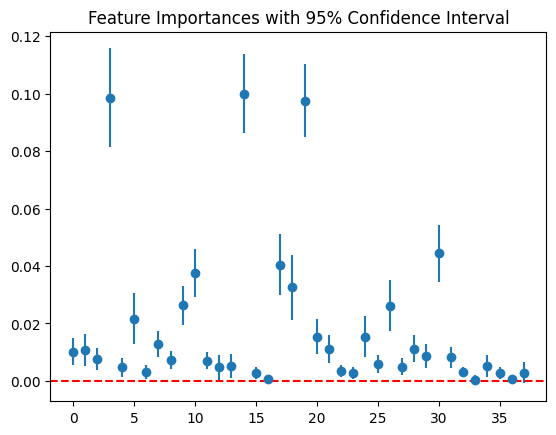

In [322]:
import matplotlib.pyplot as plt

plt.errorbar(range(len(r.importances_mean)), r.importances_mean, 
             yerr=1.96 * r.importances_std, fmt='o')
plt.axhline(0, color='red', linestyle='--')
plt.title("Feature Importances with 95% Confidence Interval")
plt.show()


In [323]:
# VIF 검사
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Variable'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data[vif_data['VIF'] > 5])  # VIF > 5는 다중공선성 문제 가능성


                   Variable        VIF
0            MaxEStateIndex  34.796058
2                  BalabanJ  12.736581
3                     Chi4n  25.238180
7                 PEOE_VSA9   5.735631
9                SlogP_VSA3  14.447443
10               SlogP_VSA6  35.831681
13              VSA_EState4   7.357444
14              VSA_EState6  21.468050
17             FractionCSP3  10.460818
18  NumAromaticHeterocycles   6.213734
19                  MolLogP  10.725329
24                   fr_NH2   5.760387


# 예측

In [324]:
y_pred = best_elastic_net.predict(X_test_scaling)

In [325]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))


2.0194456964552643
0.33885637589853235


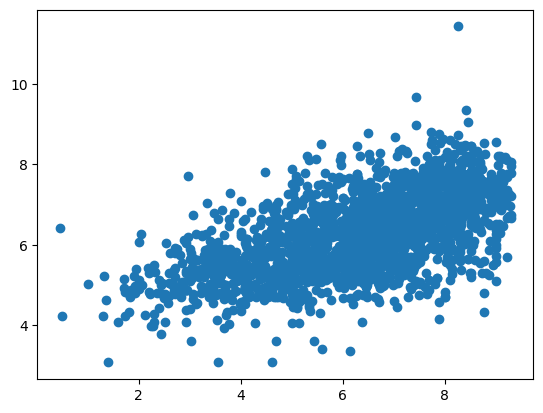

In [326]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.show()

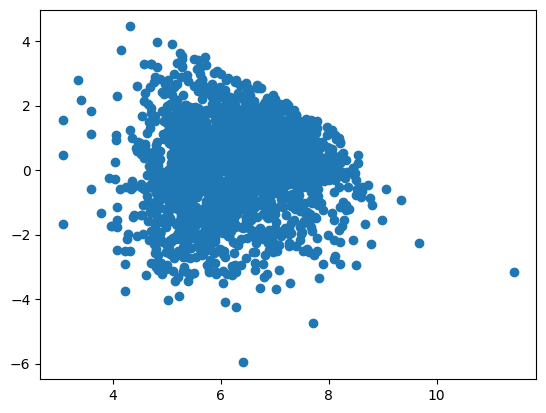

In [327]:
# 잔차 플랏
resid = y_test - y_pred

plt.scatter(y_pred, resid)
plt.show()

In [328]:
# # RFE 실행 (최종적으로 10개의 특성 선택)
# num_features = [3, 5, 7, 10, 20]
# for i in num_features:
#     rfe = RFE(estimator=optimal_elastic_net, n_features_to_select= i)
#     rfe.fit(X_train, y_train)

#     # RFE로 선택된 특성 이름 확인
#     selected_features_indices = rfe.support_
#     selected_features_names = X.columns[selected_features_indices]
#     print("최종 선택된 특성:", list(selected_features_names))

# # # 최종 선택된 특성으로 데이터프레임 생성
# # df_final_selected = ISIS_df[selected_features_names.tolist() + ['target']]
# # print("최종 데이터프레임:")
# # print(df_final_selected.head())

# p-value (부트스트랩 사용 X)

In [329]:
# from sklearn.utils import resample
# from scipy.stats import norm

# best_elastic_net.fit(X_train_scaling, y_train)

# # 원본 계수
# coef = best_elastic_net.coef_

# # 부트스트랩을 통한 유의확률 계산
# n_bootstraps = 1000
# n_features = X_train_scaling.shape[1]
# bootstrap_coefs = np.zeros((n_bootstraps, n_features))

# for i in range(n_bootstraps):
#     # 데이터 재표본화
#     X_resampled, y_resampled = resample(X_train_scaling, y_train, random_state=i)
#     # 재표본화된 데이터로 모델 학습
#     best_elastic_net.fit(X_resampled, y_resampled)
#     bootstrap_coefs[i] = best_elastic_net.coef_

# # 각 계수의 평균 및 표준편차
# coef_mean = np.mean(bootstrap_coefs, axis=0)
# coef_std = np.std(bootstrap_coefs, axis=0)

# # z-값 계산
# z_scores = (coef-coef_mean) / coef_std

# # p-value 계산 (정규분포 가정)
# p_values = 2 * (1 - norm.cdf(np.abs(z_scores)))

# # 결과 출력
# results = pd.DataFrame({
#     'Feature': [f'Feature_{i}' for i in range(n_features)],
#     'Coefficient': coef,
#     'Std_Error': coef_std,
#     'z_score': z_scores,
#     'p_value': p_values
# })

# print(results)

# # 계수의 신뢰 구간 계산 (95% 신뢰 구간)
# confidence_interval = np.percentile(bootstrap_coefs, [2.5, 97.5], axis=0)

# # 0을 포함하지 않는 계수는 유의하다고 판단
# significant_coefs = np.where(~((confidence_interval[0] <= 0) & (confidence_interval[1] >= 0)))[0]
# print("Significant coefficients:", significant_coefs)


# t-value (사용 X)

In [330]:
# best_elastic_net.fit(X_train_scaling, y_train)

# # 예측값
# y_pred = best_elastic_net.predict(X_train_scaling)
# coefficients = best_elastic_net.coef_

# # 잔차
# residuals = y_train - y_pred
# # 잔차 제곱합 SSE
# SSE = np.sum(residuals**2)
# # n-p-1
# n_p_1 = len(y_train) - X_train_scaling.shape[1] - 1
# # 잔차의 표준편차 / 오차분산의 불편추정치
# residual_std = np.sqrt(SSE / n_p_1)

# # 표준 오차 계산
# # (X^{T} * X)^{-1}의 대각선 값 추출
# X = np.array(X_train_scaling)
# XtX_inv_diag = np.diag(np.linalg.inv(np.dot(X.T, X)))
# # 표준 오차
# standard_errors = residual_std * np.sqrt(XtX_inv_diag)

# # t-통계량 계산
# t_statistics = best_elastic_net.coef_ / standard_errors

# # elastic 모형
# e_model = pd.DataFrame({'feature' : X_train.columns,
#                         'coef' : coefficients,
#                         't-value' : t_statistics,
#                         'abs(t-value)' : abs(t_statistics)})
# e_model = e_model.sort_values(by='abs(t-value)', ascending = False)
# e_model


In [331]:
# e_model[e_model['abs(t-value)'] > 3].index

In [332]:
# # t-통계량이 3 이상인 변수만 출력
# final_selected_features_index = e_model[e_model['abs(t-value)'] > 3].index

# # 최종 변수 출력
# num_features = [3, 5, 7, 10, 20]

# for i in num_features:
#     print(f'{df_name}_{i} =', list(X_train.columns[final_selected_features_index[: i]]))

# print(f'\n#{len(e_model[e_model["abs(t-value)"] > 3].feature)}개')
# print(f'{df_name}_elastic =', list(e_model[e_model['abs(t-value)'] > 3].feature))


# 이건 사용X

In [333]:
# # feature와 계수 매핑
# final_selected_features = pd.DataFrame({'Feature' : X_train.columns,
#                                        'Coefficient' : coefficients})
# # 계수
# final_selected_features = abs(final_selected_features['Coefficient']).sort_values(ascending = False)
# final_selected_features_index = final_selected_features.index
# final_selected_features_index

# final_selected_features

In [334]:
# final_selected_features_index.size

In [335]:
# # 최종 변수 출력
# num_features = [3, 5, 7, 10, 20]
# dfs = {}

# for i in num_features:
#     print(f'변수 {i}개: ', list(X_train.columns[final_selected_features_index[: i]]), '\n')
#     dfs[f'df_name_{i}'] = list(X_train.columns[final_selected_features_index[: i]])

In [336]:
# best_elastic_net.coef_.size 

## OLS 적합 (사용 X)

In [337]:
# import statsmodels.api as sm

# X_selected = X_train.iloc[:, best_elastic_net.coef_ != 0]  # 계수가 0이 아닌 변수만 선택
# ols_model = sm.OLS(y_train, X_selected).fit()

# ols_model.summary()

In [338]:
# df_coef = pd.DataFrame({'coef' : ols_model.params,
#                         'pvalue' : ols_model.pvalues,
#                         'abs_coef' : abs(ols_model.params)})
# df_coef = df_coef[df_coef['pvalue'] <= 0.05]
# df_coef = df_coef.sort_values(by = ['pvalue', 'abs_coef'], ascending = [True, False])

# print(list(df_coef.index))
# print(len(list(df_coef.index)))


## permutation importance (사용 X)

In [339]:
# from sklearn.inspection import permutation_importance

# threshold = 0.05

# result = permutation_importance(best_elastic_net, X_test_scaling, y_test, random_state = SEED)

# importances = result.importances_mean
# sorted_idx = importances.argsort()[::-1]

# threshold_selected_features = X_train.columns[sorted_idx]
# threshold_selected_features = threshold_selected_features[importances[sorted_idx] >  threshold]
# print(list(threshold_selected_features))
# print(threshold_selected_features.size)


In [340]:
# import numpy as np
# from sklearn.inspection import permutation_importance


# # 원래 데이터의 Permutation Importance 계산
# result = permutation_importance(best_elastic_net, X_test_scaling, y_test, random_state = SEED)
# original_importances = result.importances_mean

# # Null Distribution 생성: 피처를 무작위로 섞은 후 Permutation Importance 계산 반복
# n_permutations = 300
# null_distributions = np.zeros((n_permutations, X_test_scaling.shape[1]))

# for i in range(n_permutations):
#     # 타깃(y) 무작위화
#     y_permuted = np.random.permutation(y_test)
#     perm_result = permutation_importance(best_elastic_net, X_test_scaling, y_permuted, random_state = i)
#     null_distributions[i, :] = perm_result.importances_mean

# # p-value 계산: null 분포에서 original_importances보다 큰 값의 비율
# p_values = np.mean(null_distributions >= original_importances, axis=0)

# # 결과 출력
# feature_names = X_train.columns
# for feature, importance, p_value in zip(feature_names, original_importances, p_values):
#     print(f"Feature: {feature}, Importance: {importance:.4f}, p-value: {p_value:.4f}")

# # 유의한 피처 선택
# alpha = 0.05  # 유의 수준
# significant_features = feature_names[p_values <= alpha]
# print(f"Significant features (p < {alpha}): {list(significant_features)}")
